# Machine Learning Final Exam, Aug Semester, 2020
#### Pranisaa Charnparttaravanit st121720

In this exam, you will demonstrate your understanding of the material from the lectures and labs.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.
Note that you have **2.5 hours** to do the exam. Also note that there are some short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

Download the [CSV dataset](http://www.cs.ait.ac.th/~mdailey/class/ml/final-exam-data.csv) for the exam.
Note that the data are two dimensional with labels '0' and '1'. Provide a scatter plot for the data with
the two classes shown in different colors.

In [52]:
# Place code to load the data and plot the scatterplot here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('final-exam-data.csv',delimiter = ',')
data = data.to_numpy()
print(data)
X = data[:,:2]
# print(X)
y = data[:,2]
# print(y)

[[3.97416989 3.13837773 0.        ]
 [6.03743949 7.15540807 1.        ]
 [3.61964272 2.52489502 1.        ]
 ...
 [3.14824113 4.18781184 1.        ]
 [2.3552448  2.55352396 0.        ]
 [0.61800722 3.01529262 0.        ]]


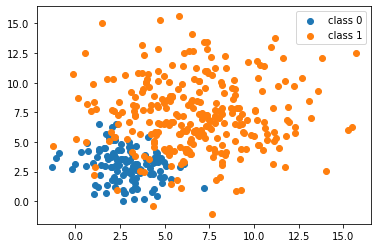

In [53]:
plt.scatter(X[y==0,0],X[y==0,1],label = 'class 0')
plt.scatter(X[y==1,0],X[y==1,1],label = 'class 1')
plt.legend()

In [54]:
# check number of samples
m = X.shape[0]
print("Number of samples: ", m)
# check number of features
n = X.shape[1]
print("Number of features: ", n)

# check number of y
assert m == y.shape[0]

Number of samples:  400
Number of features:  2


## Question 2 (30 points)

Do the following:
1. Split the dataset from Question 1 into a training set (80%) and validation set (20%).

In [55]:
# Place code to split the data, fit the LR model, output accuracy, and plot the result here
import random
m, n = X.shape
idx = np.arange(0, m)
random.shuffle(idx)
percent_train = .8
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = X[train_idx,:];
X_test = X[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];

# double check the shapes
assert X_train.shape[0] == y_train.shape[0]
# assert len(X_train)  == len(y_train)
assert X_test.shape[0] == y_test.shape[0]
# assert len(X_test) == len(y_test)

print('shapes of X_train, y_train')
print(X_train.shape,y_train.shape)
print('shapes of X_test, y_test')
print(X_test.shape,y_test.shape)

shapes of X_train, y_train
(320, 2) (320,)
shapes of X_test, y_test
(80, 2) (80,)


2. Using the logistic regression code we developed in lab, fit a logistic regression model to the data in the training set.


In [56]:
# Add dummy
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  #add intercept

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print('shapes of X_train, y_train with DUMMY added')
print(X_train.shape,y_train.shape)
print('shapes of X_test, y_test with DUMMY added')
print(X_test.shape,y_test.shape)

shapes of X_train, y_train with DUMMY added
(320, 3) (320, 1)
shapes of X_test, y_test with DUMMY added
(80, 3) (80, 1)


In [57]:
# Initializing Theta
theta_initial = np.zeros(X_train.shape[1])
theta_initial = theta_initial.reshape(-1,1)
# check shape of theta
print("="*30)
print("Shape of theta: ", theta_initial.shape)

# initial theta
print("="*30)
print("Initial theta: ", theta_initial)

Shape of theta:  (3, 1)
Initial theta:  [[0.]
 [0.]
 [0.]]


In [62]:
def predict(X, theta):
    return 1 / (1 + np.exp(- X @ theta))

# def loglike(y, ypred):
#     return sum(y * np.log(ypred) + (1-y) * np.log(1-ypred))[0]
def loglike(y, ypred):
    
    return -sum(y * np.log(ypred) + (1-y) * np.log(1-ypred))[0]

def accuracy(y, ypred):
    return sum((ypred >= 0.5) == (y == 1)) / y.size

theta = theta_initial
alpha = 0.001
cost_train = []
cost_test = []
# acc_train = []
# acc_test = []
for i in range(0,400):
    ypred_train = predict(X_train, theta)
    loglike_train = loglike(y_train, ypred_train)
    cost_train.append(loglike_train)
    acc_train = accuracy(y_train, ypred_train)
    ypred_test = predict(X_test, theta)
    loglike_test = loglike(y_test, ypred_test)
    cost_test.append(loglike_test)
    acc_test = accuracy(y_test, ypred_test)
    sbest = ''
    if i == 0 or loglike_test > loglike_test_best:
        loglike_test_best = loglike_test
        theta_best = theta
        acc_test_best = acc_test
        acc_train_best = acc_train
        sbest = '*'
#     if i % 50 == 0:
    print('Iter %d: parms (%f, %f, %f), trn like %f acc %f test like %f acc %f %s' %
          (i, theta[0], theta[1], theta[2], loglike_train, acc_train, loglike_test, acc_test, sbest))
    dtheta = X_train.T @ (y_train - ypred_train)
    theta = theta + alpha * dtheta

def plot_line(plot_handle, theta):
    X11 = -2
    X12 = (- theta[0] - theta[1] * X11) / theta[2]
    X21 = 10
    X22 = (- theta[0] - theta[1] * X21) / theta[2]
    plot_handle.plot([X11, X21], [X21, X22], 'k-')

print('Best parameters: (%f, %f, %f)' % (theta_best[0], theta_best[1], theta_best[2]))


Iter 0: parms (0.000000, 0.000000, 0.000000), trn like 221.807098 acc 0.712500 test like 55.451774 acc 0.612500 *
Iter 1: parms (0.068000, 0.630254, 0.695165), trn like 370.357067 acc 0.712500 test like 126.623743 acc 0.612500 *
Iter 2: parms (-0.020433, 0.367379, 0.429745), trn like 228.514474 acc 0.712500 test like 77.846741 acc 0.612500 
Iter 3: parms (-0.099760, 0.131902, 0.192357), trn like 141.855873 acc 0.712500 test like 44.825857 acc 0.612500 
Iter 4: parms (-0.137130, 0.092257, 0.154432), trn like 141.813199 acc 0.712500 test like 42.725912 acc 0.612500 
Iter 5: parms (-0.155252, 0.162953, 0.228892), trn like 144.013067 acc 0.712500 test like 46.566002 acc 0.612500 
Iter 6: parms (-0.201901, 0.071461, 0.137160), trn like 145.468103 acc 0.715625 test like 42.250084 acc 0.625000 
Iter 7: parms (-0.205317, 0.229229, 0.299777), trn like 159.433593 acc 0.712500 test like 53.176130 acc 0.612500 
Iter 8: parms (-0.266582, 0.064932, 0.133829), trn like 147.252811 acc 0.718750 test li

In [63]:
# print(len(cost_test))

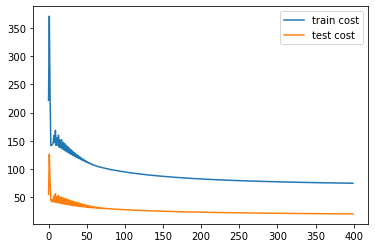

In [64]:
plt.plot(np.arange(0,400),cost_train,label = 'train cost')
plt.plot(np.arange(0,400),cost_test,label = 'test cost')
plt.legend()

3. Indicate the training set accuracy and validation set accuracy of the logistic regression model.


In [66]:
print('The accuracy of the training set: ',acc_train_best[0])
print('The accuracy of the test set: ',acc_test_best[0])

The accuracy of the training set:  0.7125
The accuracy of the test set:  0.6125


4. Make two separate plots, one for the training set and one for the validation set, with three colors: one for correctly classified points from class 1, one for correctly classified points from class 2, and one for incorrectly classified points.

#### (extra)

Text(0.5, 1.0, 'Best logistic regression classifier')

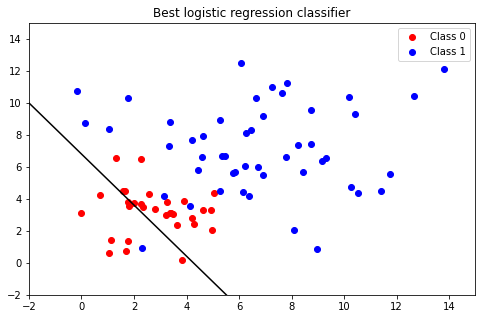

In [67]:
test_idx_0 = (y_test==0).reshape(X_test.shape[0])
test_idx_1 = (y_test==1).reshape(X_test.shape[0])

plt.figure(figsize=(8, 5))
plt.plot(X_test[test_idx_0, 1], X_test[test_idx_0, 2], 'ro', label='Class 0')
plt.plot(X_test[test_idx_1, 1], X_test[test_idx_1, 2], 'bo', label='Class 1')
plot_line(plt, theta_best)
plt.xlim([-2,15])
plt.ylim([-2,15])
plt.legend()
plt.title('Best logistic regression classifier')

### Plot of the training set

Best parameters: (0.064000, 0.618150, 0.682050)


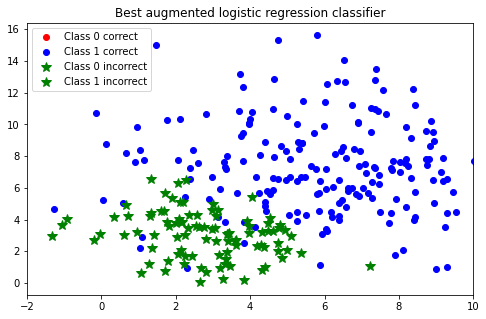

In [12]:

plt.figure(figsize=(8, 5))
y_pred_best_train = predict(X_train, theta_best)
idx_correct = (y_pred_best_train < 0.5) == (y_train == 0)
idx_correct_0 = ((y_train == 0) & idx_correct).reshape(320)
idx_correct_1 = ((y_train == 1) & idx_correct).reshape(320)
idx_incorrect_0 = ((y_train == 0) & ~idx_correct).reshape(320)
idx_incorrect_1 = ((y_train == 1) & ~idx_correct).reshape(320)

plt.plot(X_train[idx_correct_0, 1], X_train[idx_correct_0, 2], 'ro', label='Class 0 correct')
plt.plot(X_train[idx_correct_1, 1], X_train[idx_correct_1, 2], 'bo', label='Class 1 correct')
plt.plot(X_train[idx_incorrect_0, 1], X_train[idx_incorrect_0, 2], 'g*', label='Class 0 incorrect', ms=10)
plt.plot(X_train[idx_incorrect_1, 1], X_train[idx_incorrect_1, 2], 'g*', label='Class 1 incorrect', ms=10)
plt.xlim([-2,10])
plt.legend()
plt.title('Best augmented logistic regression classifier')

print('Best parameters: (%f, %f, %f)' % (theta_best[0], theta_best[1], theta_best[2]))

#### Plot of the test set

Best parameters: (0.064000, 0.618150, 0.682050)


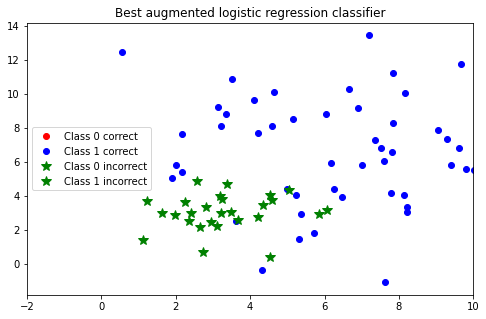

In [13]:

plt.figure(figsize=(8, 5))
y_pred_best = predict(X_test, theta_best)
idx_correct = (y_pred_best < 0.5) == (y_test == 0)
idx_correct_0 = ((y_test == 0) & idx_correct).reshape(80)
idx_correct_1 = ((y_test == 1) & idx_correct).reshape(80)
idx_incorrect_0 = ((y_test == 0) & ~idx_correct).reshape(80)
idx_incorrect_1 = ((y_test == 1) & ~idx_correct).reshape(80)

plt.plot(X_test[idx_correct_0, 1], X_test[idx_correct_0, 2], 'ro', label='Class 0 correct')
plt.plot(X_test[idx_correct_1, 1], X_test[idx_correct_1, 2], 'bo', label='Class 1 correct')
plt.plot(X_test[idx_incorrect_0, 1], X_test[idx_incorrect_0, 2], 'g*', label='Class 0 incorrect', ms=10)
plt.plot(X_test[idx_incorrect_1, 1], X_test[idx_incorrect_1, 2], 'g*', label='Class 1 incorrect', ms=10)
plt.xlim([-2,10])
plt.legend()
plt.title('Best augmented logistic regression classifier')

print('Best parameters: (%f, %f, %f)' % (theta_best[0], theta_best[1], theta_best[2]))


## Question 3 (20 points)

Repeat Question 2 using the PyTorch neural network library. Your PyTorch model should have a single linear layer with two inputs and a single output, a logistic sigmoid activation function, binary cross entropy loss function, and stochastic gradient descent for the optimizer. Show the same plots you showed for Question 2.

In [14]:
# Place code to load the data and plot the scatterplot here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('final-exam-data.csv',delimiter = ',')
data = data.to_numpy()
print(data)
X = data[:,:2]
# print(X)
y = data[:,2]
# print(y)

[[3.97416989 3.13837773 0.        ]
 [6.03743949 7.15540807 1.        ]
 [3.61964272 2.52489502 1.        ]
 ...
 [3.14824113 4.18781184 1.        ]
 [2.3552448  2.55352396 0.        ]
 [0.61800722 3.01529262 0.        ]]


In [15]:
# Place code to build, train, and evaluate your PyTorch model here
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

In [16]:
# hyperparameters
input_size = 2
output_size = 1

epochs = 20
batch_size = 50
learning_rate = 0.00005

In [17]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.l1 = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.l1(x)
        return F.sigmoid(x)

In [18]:
# Place code to split the data, fit the LR model, output accuracy, and plot the result here
import random
m, n = X.shape
idx = idx
# idx = np.arange(0, m)
# random.shuffle(idx)
percent_train = .8
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = X[train_idx,:];
X_test = X[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];

# double check the shapes
assert X_train.shape[0] == y_train.shape[0]
# assert len(X_train)  == len(y_train)
assert X_test.shape[0] == y_test.shape[0]
# assert len(X_test) == len(y_test)

print('shapes of X_train, y_train')
print(X_train.shape,y_train.shape)
print('shapes of X_test, y_test')
print(X_test.shape,y_test.shape)

shapes of X_train, y_train
(320, 2) (320,)
shapes of X_test, y_test
(80, 2) (80,)


In [19]:
# print(X)
#torch
x_data = Variable(torch.from_numpy(X_train))
y_data = Variable(torch.from_numpy(y_train))

xtest_data = Variable(torch.from_numpy(X_test))
ytest_data = Variable(torch.from_numpy(y_test))

In [20]:
model = Network()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
loss_func = torch.nn.BCELoss(reduction='sum')

In [21]:
epochs = 3000
history = { "loss": [], "accuracy": [], "loss_val": [], "accuracy_val": [] }

for i in tqdm(range(epochs)):
    y_pred = model(x_data.float())
    loss = loss_func(y_pred, y_data.view(-1,1).float())
    
    prediction = [1 if x > 0.5 else 0 for x in y_pred.data.numpy()]
    correct = (prediction == y_data.numpy()).sum()
    
    
    y_val_pred = model(xtest_data.float())
    loss_val = loss_func(y_val_pred,ytest_data.view(-1,1).float())
    prediction_val = [1 if x > 0.5 else 0 for x in y_val_pred.data.numpy()]
    correct_val = (prediction_val == ytest_data.numpy()).sum()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    history["loss"].append(loss.item())
    history["accuracy"].append(100 * correct / len(prediction))
    history["loss_val"].append(loss_val.item())
    history["accuracy_val"].append(100 * correct_val / len(prediction_val))


100%|██████████| 3000/3000 [00:05<00:00, 591.66it/s]


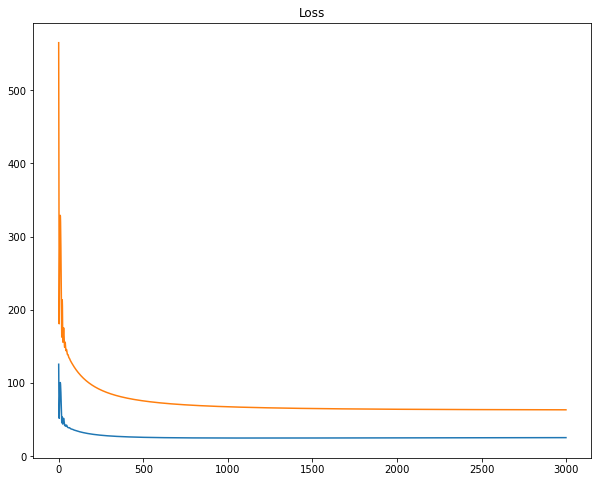

In [22]:
#loss
plt.figure(figsize=(10,8))
plt.title("Loss") 
plt.plot(history["loss_val"])
plt.plot(history["loss"])

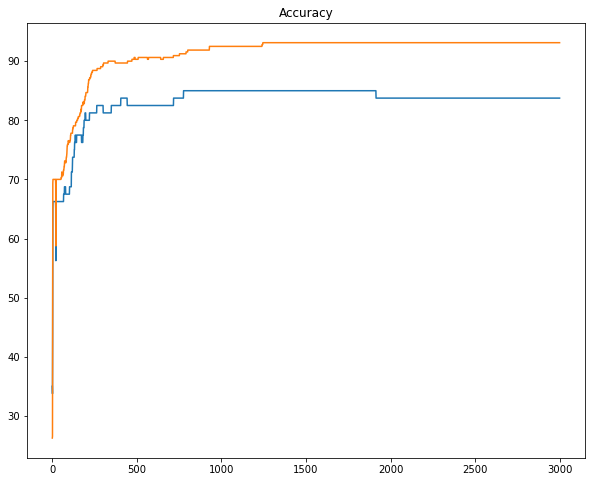

In [23]:
#Accuracy
plt.figure(figsize=(10,8))
plt.title("Accuracy") 
plt.plot(history["accuracy_val"])
plt.plot(history["accuracy"])

### Plot of the training set

In [24]:
prediction = np.array(prediction)

Best parameters: (0.064000, 0.618150, 0.682050)


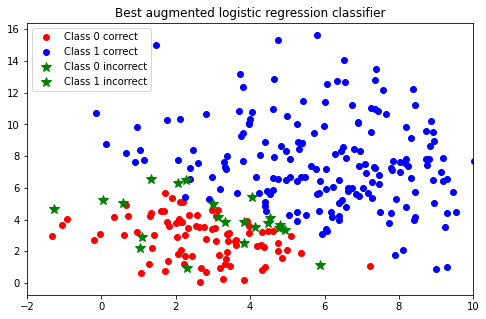

In [25]:

plt.figure(figsize=(8, 5))
# y_pred_best_train = predict(X_train, theta_best)
idx_correct = (prediction < 0.5) == (y_train == 0)
idx_correct_0 = ((y_train == 0) & idx_correct).reshape(320)
idx_correct_1 = ((y_train == 1) & idx_correct).reshape(320)
idx_incorrect_0 = ((y_train == 0) & ~idx_correct).reshape(320)
idx_incorrect_1 = ((y_train == 1) & ~idx_correct).reshape(320)

plt.plot(X_train[idx_correct_0, 0], X_train[idx_correct_0, 1], 'ro', label='Class 0 correct')
plt.plot(X_train[idx_correct_1, 0], X_train[idx_correct_1, 1], 'bo', label='Class 1 correct')
plt.plot(X_train[idx_incorrect_0, 0], X_train[idx_incorrect_0, 1], 'g*', label='Class 0 incorrect', ms=10)
plt.plot(X_train[idx_incorrect_1, 0], X_train[idx_incorrect_1, 1], 'g*', label='Class 1 incorrect', ms=10)
plt.xlim([-2,10])
plt.legend()
plt.title('Best augmented logistic regression classifier')

print('Best parameters: (%f, %f, %f)' % (theta_best[0], theta_best[1], theta_best[2]))

### Plot of the test set


In [26]:
# print(type(prediction_val))
prediction_val = np.array(prediction_val)
# print(type(prediction_val))

Best parameters: (0.064000, 0.618150, 0.682050)


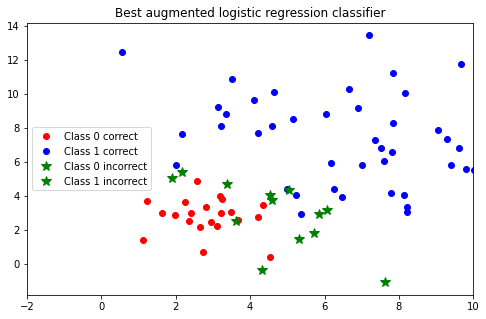

In [27]:

plt.figure(figsize=(8, 5))
# y_pred_best = predict(X_test, theta_best)
idx_correct = (prediction_val < 0.5) == (y_test == 0)
idx_correct_0 = ((y_test == 0) & idx_correct).reshape(80)
idx_correct_1 = ((y_test == 1) & idx_correct).reshape(80)
idx_incorrect_0 = ((y_test == 0) & ~idx_correct).reshape(80)
idx_incorrect_1 = ((y_test == 1) & ~idx_correct).reshape(80)

plt.plot(X_test[idx_correct_0, 0], X_test[idx_correct_0, 1], 'ro', label='Class 0 correct')
plt.plot(X_test[idx_correct_1, 0], X_test[idx_correct_1, 1], 'bo', label='Class 1 correct')
plt.plot(X_test[idx_incorrect_0, 0], X_test[idx_incorrect_0, 1], 'g*', label='Class 0 incorrect', ms=10)
plt.plot(X_test[idx_incorrect_1, 0], X_test[idx_incorrect_1, 1], 'g*', label='Class 1 incorrect', ms=10)
plt.xlim([-2,10])
plt.legend()
plt.title('Best augmented logistic regression classifier')

print('Best parameters: (%f, %f, %f)' % (theta_best[0], theta_best[1], theta_best[2]))


## Question 4 (20 points)

Add a 10-unit hidden layer with ReLU activation to the PyTorch model from Question 3. Plot training loss and validation loss as function of epoch of training. Do you see any evidence of overfitting?

In [40]:
# Place code to load the data and plot the scatterplot here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('final-exam-data.csv',delimiter = ',')
data = data.to_numpy()
print(data)
X = data[:,:2]
# print(X)
y = data[:,2]
# print(y)

[[3.97416989 3.13837773 0.        ]
 [6.03743949 7.15540807 1.        ]
 [3.61964272 2.52489502 1.        ]
 ...
 [3.14824113 4.18781184 1.        ]
 [2.3552448  2.55352396 0.        ]
 [0.61800722 3.01529262 0.        ]]


In [41]:
# Place code to build, train, and evaluate your PyTorch model here
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

In [42]:
# Place code to split the data, fit the LR model, output accuracy, and plot the result here
import random
m, n = X.shape
idx = idx
# idx = np.arange(0, m)
# random.shuffle(idx)
percent_train = .8
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = X[train_idx,:];
X_test = X[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];

# double check the shapes
assert X_train.shape[0] == y_train.shape[0]
# assert len(X_train)  == len(y_train)
assert X_test.shape[0] == y_test.shape[0]
# assert len(X_test) == len(y_test)

print('shapes of X_train, y_train')
print(X_train.shape,y_train.shape)
print('shapes of X_test, y_test')
print(X_test.shape,y_test.shape)

shapes of X_train, y_train
(320, 2) (320,)
shapes of X_test, y_test
(80, 2) (80,)


In [43]:
# print(X)
#torch
x_data = Variable(torch.from_numpy(X_train))
y_data = Variable(torch.from_numpy(y_train))

xtest_data = Variable(torch.from_numpy(X_test))
ytest_data = Variable(torch.from_numpy(y_test))

In [44]:
# hyperparameters
input_size = 2
output_size = 1
hidden_size = 10

epochs = 20
batch_size = 50
learning_rate = 0.00005

In [45]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l3(x)
        return F.sigmoid(x)

In [46]:
net = Network()
print(net)

Network(
  (l1): Linear(in_features=2, out_features=10, bias=True)
  (relu): ReLU()
  (l3): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [47]:
loss_func = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

In [48]:
epochs = 3000
history = { "loss": [], "accuracy": [], "loss_val": [], "accuracy_val": [] }

for i in tqdm(range(epochs)):
    y_pred = net(x_data.float())
    loss = loss_func(y_pred, y_data.view(-1,1).float())
    
    prediction = [1 if x > 0.5 else 0 for x in y_pred.data.numpy()]
    correct = (prediction == y_data.numpy()).sum()
    
    
    y_val_pred = net(xtest_data.float())
    loss_val = loss_func(y_val_pred,ytest_data.view(-1,1).float())
    prediction_val = [1 if x > 0.5 else 0 for x in y_val_pred.data.numpy()]
    correct_val = (prediction_val == ytest_data.numpy()).sum()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    history["loss"].append(loss.item())
    history["accuracy"].append(100 * correct / len(prediction))
    history["loss_val"].append(loss_val.item())
    history["accuracy_val"].append(100 * correct_val / len(prediction_val))


100%|██████████| 3000/3000 [00:07<00:00, 423.82it/s]


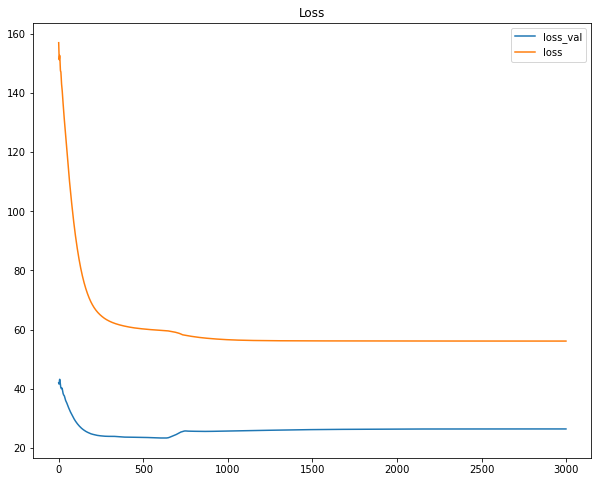

In [49]:
#loss
plt.figure(figsize=(10,8))
plt.title("Loss") 
plt.plot(history["loss_val"],label = 'loss_val')
plt.plot(history["loss"],label = 'loss')
plt.legend()

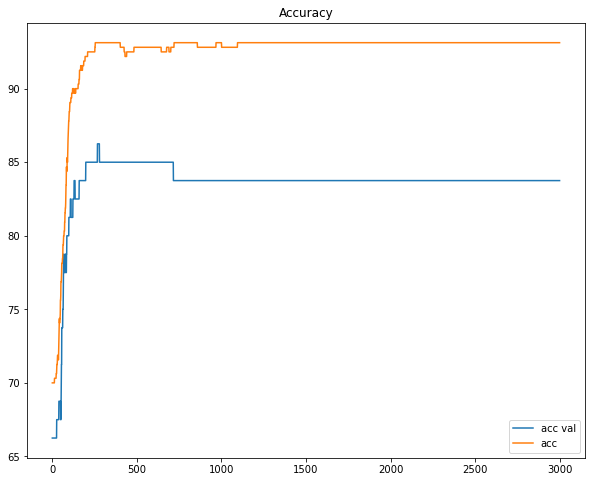

In [50]:
#Accuracy
plt.figure(figsize=(10,8))
plt.title("Accuracy") 
plt.plot(history["accuracy_val"],label= 'acc val')
plt.plot(history["accuracy"],label= 'acc')
plt.legend()

*Discuss whether you observe overfitting here.*

ANSWER: 
No, i do not see the evidence of overfitting.

## Question 5 (10 points)

In fact, the data from Question 1 were generated from a Gaussian mixture model. If you were given the data without the labels, for unsupervised learning, do you think the EM algorithm for Gaussian mixtures with $k=2$ components would recover the two classes? Why or why not?

*Discuss here.*

ANSWER:
    Yes, i believe that if we were to use Gaussian mixtures with k = 2, it would perform well. Since our data for each class are of different sizes, in terms of number of data as well as the distributions. 
    In GMM, it includes Prior probability during training and accounts for the vairance.

## Question 6 (10 points)

Consider the following problem: Students taking classes in Room TC 103 often feel the room is too cold or too hot. To solve the problem, we connect three air conditioners' on/off switches to a computer, place a temperature sensor outdoors next to the room, and put a button box on each student's desk with 3 buttons, labeled "I'm freezing," "I'm sweating", and "I feel good." Students can press any of the three buttons to indicate their comfort level. Every 10 minutes, the outdoor temperature is measured in degrees Celsius, and the current comfort level of each student (1, 2, or 3) is measured. The system gets the measurements as input and then has to set the control for each of the three air conditioners to high, low, or off for the next 10 minutes.

Suppose you would like to build a reinforcement learning agent to optmize the air conditioning control for the room. Do the following:

1. Briefly explain the state space, action space, reward function, and discount factor you think should be used for this problem.
2. Briefly explain the reason it is difficult to know the transition probabilities for this problem.
3. Briefly describe how you could use a neural network to learn the state transition probabilities.

*Write your explanations here.*

1. As for the state space, it could be the states the current temperatures from the optimal temperature. As for the action space, system may choose either to set the control for each of the three air conditions to high,low or off meaning that each time it resets, there are in the total of 27 possible actions. As for the reward function, it can be chosen freely, what is important is thatthe control objectives should revolve around stability of the temperature inside. It could be related to the number of percentage of students choosing "i feel good" and the outside temperature. As for discount factor, there are many uncertainties during the operation optimization of the HVAC system, including the temperature, the humidities, the number of people inside the room, however, an appropriate value of discount factor would be around 0.9


2. It is difficult to know the transition probabilities for this problem because there are many possible actions to be selected. Therefore, it is rather difficult (takes many time steps) for RL to know which actions lead to which outcomes

3. Since reinforcement algorthms can start from a blank state, and under the right conditions, they improve. It can solve the difficcult problem of correlating immediate actions with the delayed return they produce. However, RL algorithm sometimes have to wait a while to see the fruit of their decisions. They operate in a dealyed return environment, where it can be difficult to understand which action leads to which outcome over many time steps. Therefore, when implementing neural network into the system, it enables the agents to learn the best actions possible in virtual environment in order to attain their goals. That is, it unites function approximation and target optimization, mapping state-action pairs to expected rewards